## Triage Analysis using Naive Bayes Algorithm ##

The following model will be used to decide the category of the incomming patients
deciding whether they are in critical state or are in normal or in between. 

The model takes in the following data as input:
- Complaint_Code (Integer): The reason they are here (e.g., 0 for Chest Pain, 1 for Flu).
- HR (Integer): Heart Rate.
- BP (Integer): Blood Pressure (Systolic).
- Temp (Float): Body Temperature.
- SpO2 (Integer): Oxygen level.

And gives the following data as output: 
- Urgency_Label (Integer):
    - 0: Low (Stable)
    - 1: Medium (Observation)
    - 2: Critical (Immediate ICU)

In [1]:
# IMPORTS

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

In [2]:
# DATA

data = pd.read_csv('../data/raw/patients.csv')
data.head()

,ID,Age,Gender,HR,BP,Temp,SpO2,Complaint,Urgency,LOS
0,0,42,0,118,108,36.8,99,Trauma,Medium,5.5
1,1,31,1,113,199,36.9,100,Chest Pain,Critical,9.4
2,2,41,1,124,156,36.7,99,Chest Pain,Medium,7.0
3,3,53,0,73,128,36.7,97,General Checkup,Low,2.2
4,4,70,1,104,125,36.6,83,Difficulty Breathing,Critical,10.2


In [3]:
# adding numarical labels to Complaint and Urgency caulmn

le_complaint = LabelEncoder()
le_urgency = LabelEncoder()

data['Complaint_Code'] = le_complaint.fit_transform(data['Complaint'])
data['Urgency_Code'] = le_urgency.fit_transform(data['Urgency'])
data.head()

print("\nAutomatic mapping:")
print(dict(zip(le_complaint.classes_, range(len(le_complaint.classes_)))))
print(dict(zip(le_urgency.classes_, range(len(le_urgency.classes_)))))


Automatic mapping:
{'Chest Pain': 0, 'Difficulty Breathing': 1, 'Flu': 2, 'General Checkup': 3, 'Trauma': 4}
{'Critical': 0, 'Low': 1, 'Medium': 2}


In [4]:
# splitting data into training and testing sets

feature_order = ['Age', 'Gender', 'Complaint_Code', 'HR', 'BP', 'Temp', 'SpO2']
X = data.loc[:, feature_order]
y = data.loc[:, ["Urgency_Code"]]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (8000, 7)
X_test shape = (2000, 7)
y_train shape = (8000, 1)
y_test shape = (2000, 1)


In [6]:
# GaussianNB modelling

gnb_model = GaussianNB()

gnb_model.fit(X_train, y_train.values.reshape(-1))

GaussianNB()

In [7]:
y_pred = gnb_model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8040


In [9]:
# CONFUSION METRICS

confusionmetrics = metrics.confusion_matrix(y_test, y_pred)
print(confusionmetrics)

[[659   0   4]
 [ 84 509 124]
 [180   0 440]]


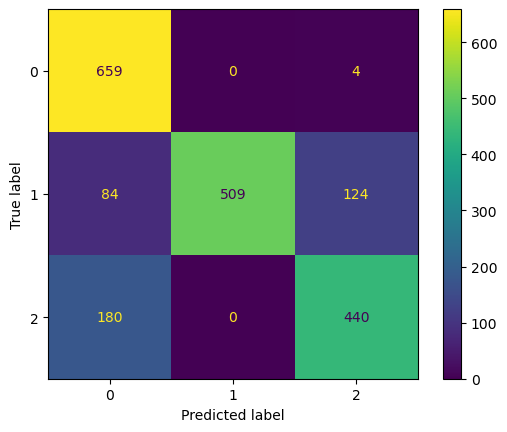

In [10]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionmetrics)
cm_display.plot()
plt.show()

In [11]:
# EXPORTING MODEL TO SRC

joblib.dump(gnb_model, '../src/models/triage.pkl')
joblib.dump(le_complaint, '../src/models/encoder_complaint.pkl')
joblib.dump(le_urgency, '../src/models/encoder_urgency.pkl')
joblib.dump(scaler, '../src/models/scaler.pkl')

['../src/models/scaler.pkl']